In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append("../")

from src.enzyme_hackathon.utils import (one_hot_dict, one_hot_encode, one_hot_encode_screening_data,
                                        one_hot_encode_sequences)
from src.enzyme_hackathon.utils import AA_LABELS
from src.enzyme_hackathon.utils import (create_fc_model, predict, generate_variant, r_squared, nan_mse)
import keras
import tensorflow as tf

from collections import OrderedDict

Using TensorFlow backend.


In [2]:
?tf.save

Object `tf.save` not found.


In [3]:
fc_nn = keras.models.load_model("../models/FCNN_50_ADAM.hfd5", custom_objects={"nan_mse": nan_mse, "r_squared": r_squared})

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


# Load train/test data

In [4]:
regression_df = pd.read_csv("../data/raw/challenge-0.csv")
encoded_split_dict = one_hot_encode_screening_data(regression_df)
x_train, x_test = (encoded_split_dict['x'][0], encoded_split_dict['x'][1])
y_keys = [key for key in encoded_split_dict['y'].keys()]

y_train, y_test = (OrderedDict(), OrderedDict())
for y_key in y_keys:
    y_train[y_key], y_test[y_key] = (encoded_split_dict['y'][y_key]['data'][0], encoded_split_dict['y'][y_key]['data'][1])

# Generate variants

In [5]:
[regression_df.sequence[0]]

['AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRGGASFVPGEPSTQDGNGHGTHVAGTIAALNNSIGVLGVAPSAELLYAVKVLGASGSSTGSSVSSIAQGLEWAGNNGMTVANLSLGATSPSATLEQAVNAATSRGVLVVAASGNSGAGSISYPARYANAMAVGATDQNNNRASFSQYGAGLDIVAPGVNVQSTYPGSTYASLNGASMATPHVAGAAALVKQKNPSWSNVQIRNHLKNTATSLGGSSTTNNLYGSGLVNAEAATR']

In [6]:
predict(regression_df.sequence[0], fc_nn, encoded_split_dict, one_hot_dict(AA_LABELS))

array([1.4826045 , 0.97867876, 1.2242274 ], dtype=float32)

In [10]:
variants = []
for i in range(10000):
    variant, variant_performance = generate_variant(regression_df.sequence[0], 
                         fc_nn, 
                         encoded_split_dict,
                         AA_LABELS)
    variant_performance['sequence'] = variant
    variants.append(variant_performance)

In [15]:
df_variants = pd.DataFrame(variants) \
    .assign(fitness = lambda x: x['productivity']*x['performance']*x['stability']) \
    .sort_values('fitness', ascending=False)

In [25]:
df_variants

,productivity,performance,stability,sequence,fitness
2926,1.414919,1.047267,1.533646,"[A, Q, S, V, P, W, G, I, S, R, V, Q, A, P, A, ...",2.272552
1964,1.843460,1.006274,1.212961,"[A, Q, S, A, P, W, G, I, S, R, V, Q, A, P, A, ...",2.250074
9777,1.448400,1.018636,1.503468,"[A, Q, S, V, P, W, G, I, S, R, V, Q, A, P, A, ...",2.218206
6360,1.457753,1.015378,1.496100,"[A, Q, S, V, P, W, G, I, S, R, V, Q, A, P, A, ...",2.214481
1546,1.457948,1.018702,1.486360,"[A, Q, S, V, P, A, G, I, S, R, V, Q, A, P, A, ...",2.207564
9844,1.464868,1.017642,1.476096,"[A, Q, S, K, P, W, G, I, S, R, V, Q, A, P, A, ...",2.200432
3049,1.482862,1.142444,1.292327,"[A, Q, S, V, P, W, G, I, S, R, S, Q, A, P, A, ...",2.189315
9696,1.441151,1.012441,1.499173,"[A, Q, S, V, P, D, G, I, S, R, V, Q, A, P, A, ...",2.187414
2909,1.439916,1.030159,1.469270,"[A, Q, S, V, K, W, G, I, S, R, V, Q, A, V, K, ...",2.179429
9335,1.517610,1.167629,1.225401,"[W, Q, S, V, P, W, G, I, S, R, V, Q, A, P, A, ...",2.171416


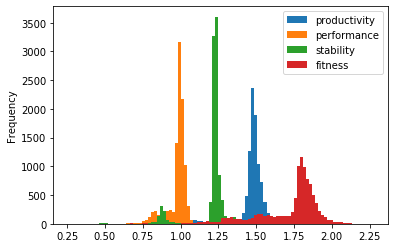

In [16]:
df_variants.plot(kind='hist', bins=100)

In [20]:
sequences = [("".join(seq)) for seq in df_variants.sequence[:10]]

In [21]:
sequences

['AQSVPWGISRVQAPAAHNIGLTGSGVKVAVLETGISTHPDLNIRRGGASFVPGEPSTQDGNGHGTHVAGTIAALNNSIGVLLVAPSAELLYAVKVLGASGSSTGSSVSSSAQALEWAGNNGNTVANLSLGATSPSATLEQAVNNATSRGVLVVAASGNSNAGSIVYPARYANAMAHGATDFNNNRASFSQYGAGLDIVAPGVNVQSTYPGSTYASLNGASMATPHVACAAALVKQKNPGWSNVQIRNHLKNTATSLGGSSTTNNLYGSGLVNAEAATR',
 'AQSAPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRGGASFVPGEPSTQIGNGHGTHVAGTIAALNNCIGVLGVAPSAELLYAVKVLGASGTSTGSSVSSIAQGLEWAGNNGMTVANASLGATSPSHTLEQAVNAATSRGVLVVAASGNSGAGSISYPARYANAMAVGATDQNNNRASFSQYGAGLDIVAPGQNVQSTYPGSTYASLNGASMSTPHVAGAAALVKQKNPSWSNVQSRNYLKNTATSLGGSSTTYNLYGSGLVNAEAATR',
 'AQSVPWGISRVQAPALHNRGLTGSGVKVAVLDTGISTFPDLNIRRGGASFVPLEPSTQDGNGHGTHVAGTIAALYNSIGVLGVAPSAELLYAVKVLGASGSSTGSSVSSIAQALEWAGNNGMTVANLSLGATSPSATLEQAVNAQTSRFVLVVAASGNSGAGSISYPAKYANAMAVGATDQNNNRASFSQYGAGLDIVAPGVNVQSTYPGSTYASLNGASMATPHVAGAAALVKQKNPAWSNVQIGNHLKNTATSLGGSSTTNNLYGSGLVNAEAATR',
 'AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRGSASFVPCNPSTQDGNGQGTHVAGTIAALNNSIGHLGVAPSAELLYAVKVLGASGSSTGSSVSSIAQGLEWAGNNGMTVANLSLGATSPSATLEQFVNSATSAG

In [22]:
import requests

# sequences as a list, one sequence per element.
# sequences = [('AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRGGASFVPGEPSTQDGNGHGTHVA'
#               'GTIAALNNSIGVLGVAPSAELLYAVKVLGASGSSGGSSVSSIAQGLEWAGNNGMHVANLSLGSPSPSA'
#               'TLEQAVNSATSRGVLVVAASGNSGAGSISYPARYANAMAVGATDQNNNRASFSQYGAGLDIVAPGVNV'
#               'QSTYPGSTAASLNGTSMATPHVAGAAALVKQKNPSWSNVQIRNHLKNTATSLGGSSTTNNLYGSGLVA'
#               'AEAATR'),
#              ('AQSVPWGASRVQAPAAHNRGLTGSGVAVAVLDTGISTHPDLNIRRGGASFVPGEPSTQDGNGHGTHVA'
#               'GTIAALNNSIGVLGVAPSAELLYAVKVLGASGSSGGSSVSSIAQGLEWAGNNGMHVANLSLGSPSPSA'
#               'TLEQAVNSATSRGVLVVAASGNSGAGSISYPARYANAMAVGATDQNNNRASFSQYGAGLDIVAPGVNV'
#               'QSTYPGSTYASLNGTSMATPHVAGAAALVKQKNPSWSNVQIRNHLKNTATSLGGSSTTNNLYGSGLVN'
#               'AEAATR')]

payload = {'team': 'Qteam', 'challenge': 0, 'sequences': sequences}

r = requests.post('http://find-the.best/enzyme', json=payload)
r.status_code, r.reason

(200, 'OK')

In [23]:
pd.DataFrame(r.json())

,fitness,performance,productivity,sequence,stability
0,2.740512,1.000272,1.493615,AQSVPWGISRVQAPAAHNIGLTGSGVKVAVLETGISTHPDLNIRRG...,1.834320
1,2.448168,0.915750,1.999696,AQSAPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,1.336904
2,2.802736,1.003354,1.516801,AQSVPWGISRVQAPALHNRGLTGSGVKVAVLDTGISTFPDLNIRRG...,1.841617
3,2.774999,0.996351,1.504112,AQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,1.851697
4,2.757721,1.000625,1.503057,AQSVPAGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,1.833595
5,2.749391,1.000731,1.493738,AQSKPWGISRVQAPAAHNRGLTGEGVKVAVLDTGISTHPDLNIRRG...,1.839267
6,2.451090,1.238947,1.477790,AQSVPWGISRSQAPAAHNRGLTGSGVKAAVLDTGISTHPDLNIRRG...,1.338732
7,2.740097,0.992560,1.509738,AQSVPDGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,1.828553
8,2.719760,0.996738,1.479408,AQSVKWGISRVQAVKAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,1.844428
9,2.467686,1.244449,1.490329,WQSVPWGISRVQAPAAHNRGLTGSGVKVAVLDTGISTHPDLNIRRG...,1.330549


In [24]:
df_variants.head(10)

,productivity,performance,stability,sequence,fitness
2926,1.414919,1.047267,1.533646,"[A, Q, S, V, P, W, G, I, S, R, V, Q, A, P, A, ...",2.272552
1964,1.843460,1.006274,1.212961,"[A, Q, S, A, P, W, G, I, S, R, V, Q, A, P, A, ...",2.250074
9777,1.448400,1.018636,1.503468,"[A, Q, S, V, P, W, G, I, S, R, V, Q, A, P, A, ...",2.218206
6360,1.457753,1.015378,1.496100,"[A, Q, S, V, P, W, G, I, S, R, V, Q, A, P, A, ...",2.214481
1546,1.457948,1.018702,1.486360,"[A, Q, S, V, P, A, G, I, S, R, V, Q, A, P, A, ...",2.207564
9844,1.464868,1.017642,1.476096,"[A, Q, S, K, P, W, G, I, S, R, V, Q, A, P, A, ...",2.200432
3049,1.482862,1.142444,1.292327,"[A, Q, S, V, P, W, G, I, S, R, S, Q, A, P, A, ...",2.189315
9696,1.441151,1.012441,1.499173,"[A, Q, S, V, P, D, G, I, S, R, V, Q, A, P, A, ...",2.187414
2909,1.439916,1.030159,1.469270,"[A, Q, S, V, K, W, G, I, S, R, V, Q, A, V, K, ...",2.179429
9335,1.517610,1.167629,1.225401,"[W, Q, S, V, P, W, G, I, S, R, V, Q, A, P, A, ...",2.171416
